<a href="https://colab.research.google.com/github/Gulayrose/AWS_Autoscout/blob/main/Fraud_Detection_Student_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, Neural Network*** algorithms and ***SMOTE*** technique. Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

At the end of the project, you will have the opportunity to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (streamlit api) as well as the theory behind Logistic Regression, Random Forest, Neural Network.*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can show the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the SMOTE technique used to increase the sample for unbalanced data. Next, rebuild your Logistic Regression model with SMOTE applied data to observe its effect.

Then, you will use three different algorithms in the model building phase. You have applied Logistic Regression and Random Forest in your previous projects. However, the Deep Learning Neural Network algorithm will appear for the first time.

In the final step, you will deploy your model using ***Streamlit API***. 

**Optional**: You can Dockerize your project and deploy on cloud.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Exploratory Data Analysis
- Data Cleaning



    
#### 2. Data Preprocessing

- Scaling
- Train - Test Split


#### 3. Model Building

- Logistic Regression without SMOTE
- Apply SMOTE
- Logistic Regression with SMOTE
- Random Forest Classifier with SMOTE
- Neural Network

#### 4. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [2]:
import numpy as np 
import pandas as pd 
from pandas.plotting import register_matplotlib_converters
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

import matplotlib.pyplot as plt
from collections import Counter

from pylab import rcParams
plt.rcParams['figure.figsize'] = (6,6)
plt.rcParams['figure.dpi'] = 100

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns', None)



In [3]:
!pip install unrar
!unrar x /content/drive/MyDrive/creditcard.part1.rar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/creditcard.part1.rar

Extracting  creditcard.csv                                                 6% 12% 19% 25% 31% 38% 39%

Extracting from /content/drive/MyDrive/creditcard.part2.rar

...         creditcard.csv                                                46% 52% 58% 65% 71% 77% 79%

Extracting from /content/drive/MyDrive/creditcard.part3.rar

...         creditcard.csv                                                85% 92% 98% 99%  OK 
All OK


In [4]:
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

Veri kümeleri, Avrupalı ​​kart sahipleri tarafından Eylül 2013'te kredi kartlarıyla yapılan işlemleri içerir. Bu veri kümesi, 284,807 işlemden 492'sinin dolandırıcılık olduğu iki gün içinde gerçekleşen işlemleri sunar. Veri kümesi oldukça dengesizdir, pozitif sınıf (dolandırıcılık) tüm işlemlerin %0,172'sini oluşturur.

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Exploratory Data Analysis

In [8]:
df.shape

(284807, 31)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
df.Time.value_counts() #burdaki degerler sn cinsinden 

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
127750.0     1
62260.0      1
62259.0      1
127753.0     1
172792.0     1
Name: Time, Length: 124592, dtype: int64

In [12]:
df.Amount.value_counts()

1.00       13688
1.98        6044
0.89        4872
9.99        4747
15.00       3280
           ...  
62.09          1
552.05         1
1467.75        1
196.68         1
95.63          1
Name: Amount, Length: 32767, dtype: int64

In [13]:
df.Class.value_counts() ##dolandırıcılık durumunda 1, aksi durumda 0 değerini alır.

0    284315
1       492
Name: Class, dtype: int64

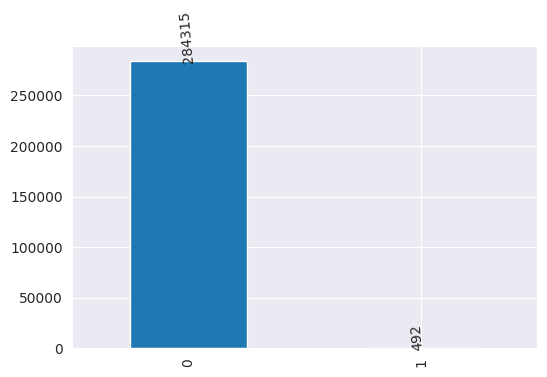

In [14]:
fig, ax = plt.subplots(figsize=(6,4))
df.Class.value_counts(ascending=False).plot.bar();
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+20),rotation=95);

In [15]:
df_class1=df[df.Class == 1]

In [16]:
df_class0=df[df.Class== 0 ]

In [17]:
df_class1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [18]:
df[df.Class == 1].describe().T.style.background_gradient(cmap='Spectral_r')

,count,mean,std,min,25%,50%,75%,max
Time,492.000000,80746.806911,47835.365138,406.000000,41241.500000,75568.500000,128483.000000,170348.000000
V1,492.000000,-4.771948,6.783687,-30.552380,-6.036063,-2.342497,-0.419200,2.132386
V2,492.000000,3.623778,4.291216,-8.402154,1.188226,2.717869,4.971257,22.057729
V3,492.000000,-7.033281,7.110937,-31.103685,-8.643489,-5.075257,-2.276185,2.250210
V4,492.000000,4.542029,2.873318,-1.313275,2.373050,4.177147,6.348729,12.114672
V5,492.000000,-3.151225,5.372468,-22.105532,-4.792835,-1.522962,0.214562,11.095089
V6,492.000000,-1.397737,1.858124,-6.406267,-2.501511,-1.424616,-0.413216,6.474115
V7,492.000000,-5.568731,7.206773,-43.557242,-7.965295,-3.034402,-0.945954,5.802537
V8,492.000000,0.570636,6.797831,-41.044261,-0.195336,0.621508,1.764879,20.007208
V9,492.000000,-2.581123,2.500896,-13.434066,-3.872383,-2.208768,-0.787850,3.353525


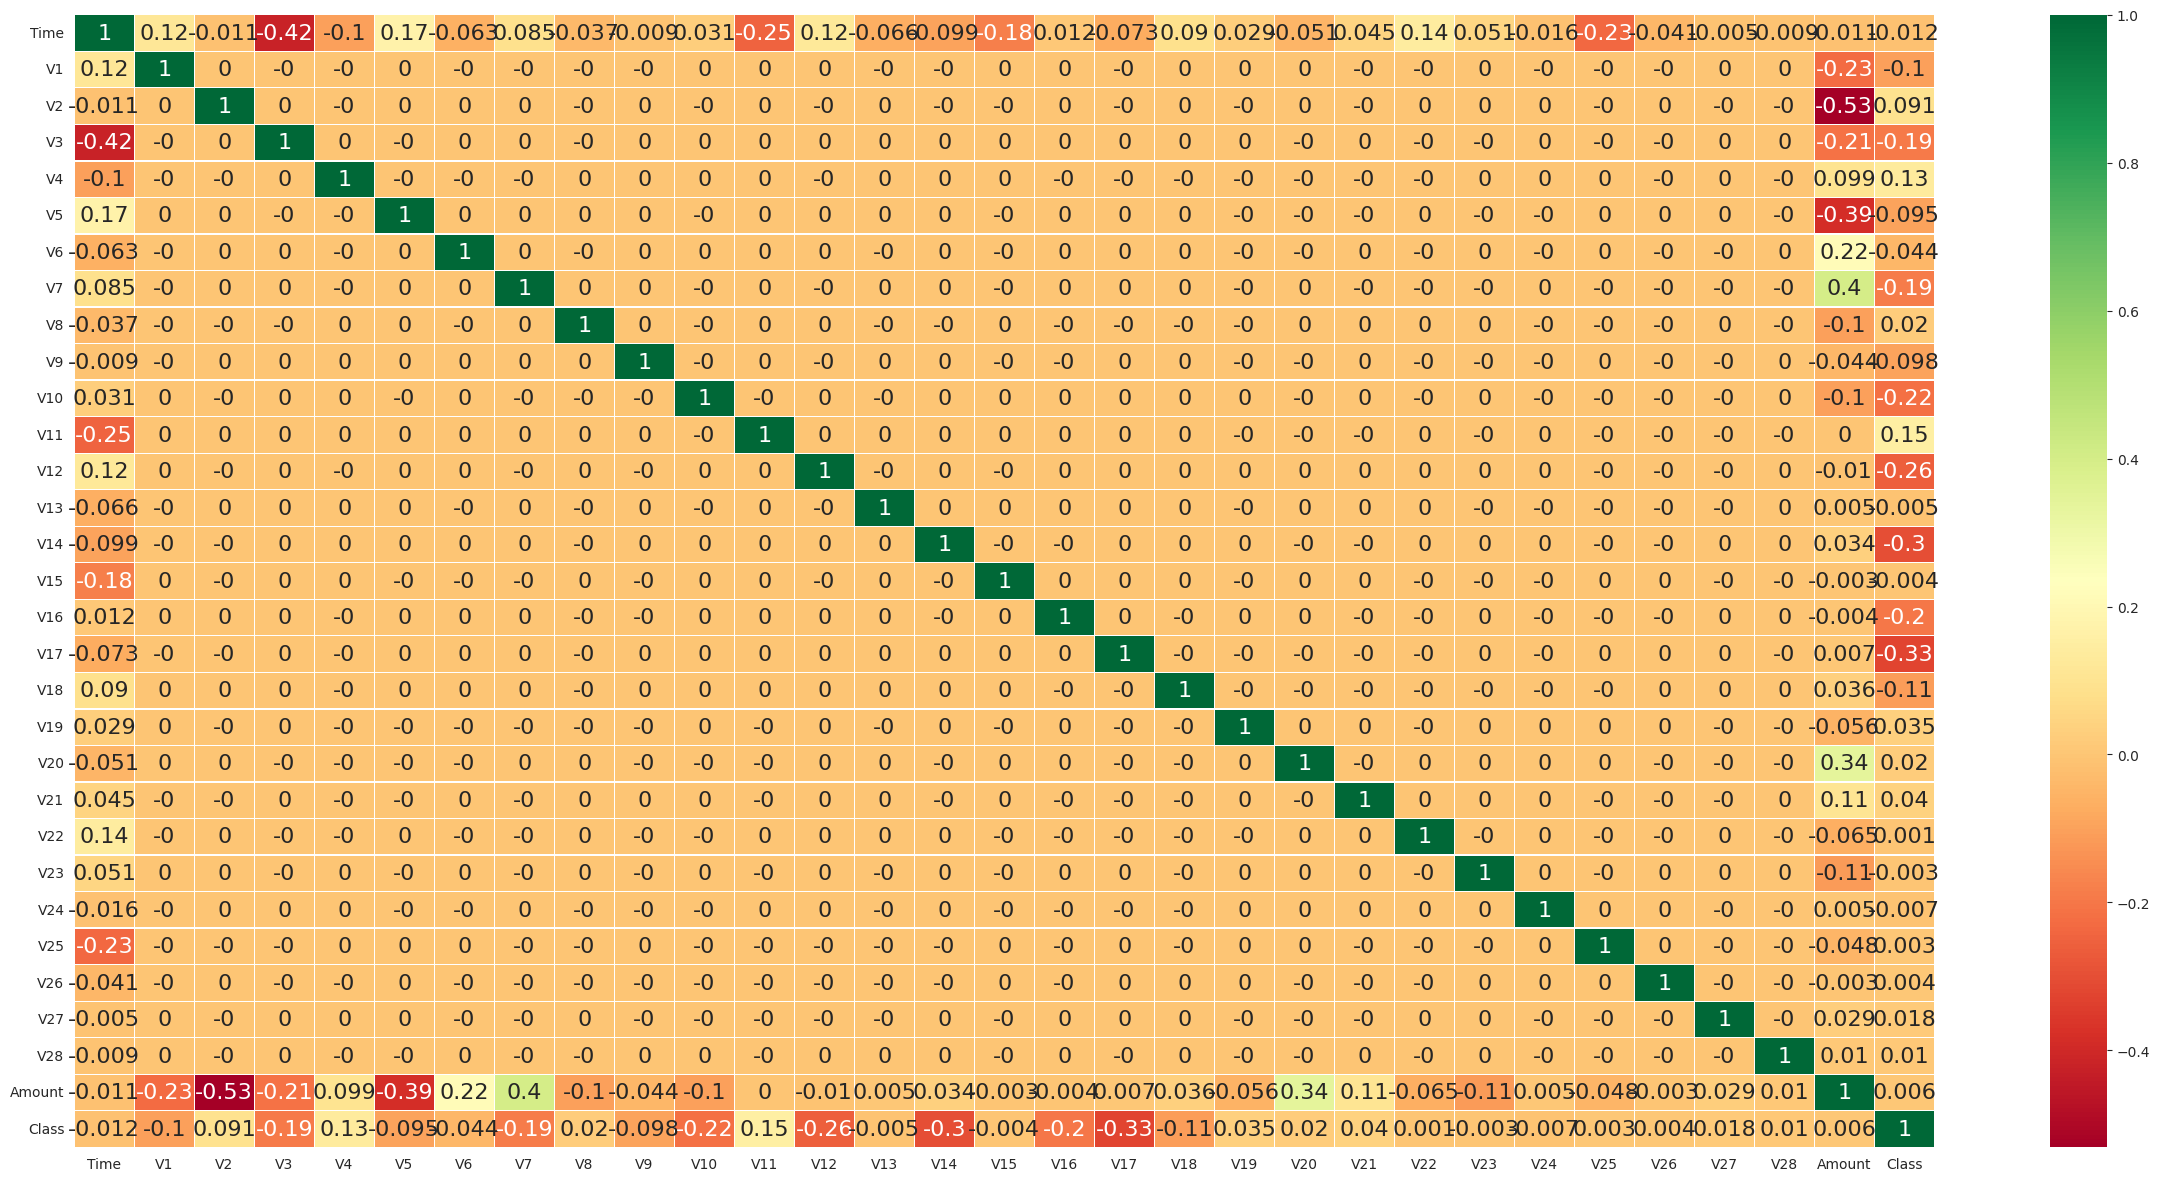

In [19]:
plt.figure(figsize = (30, 15))
sns.heatmap(round(df.corr(), 3), annot = True, cmap = 'RdYlGn', linewidth = 0.2, annot_kws = {'size' : 16});

Class ile corr iliskileri yuksek olan feature' lar ile de model kurduk fakat azinlikta olan 1 class' inin corr iliskisine bakarak model kurmak daha saglikli olacagi icin feature selection islemini asagida shap yontemi ile yapmayi tercih ettik.


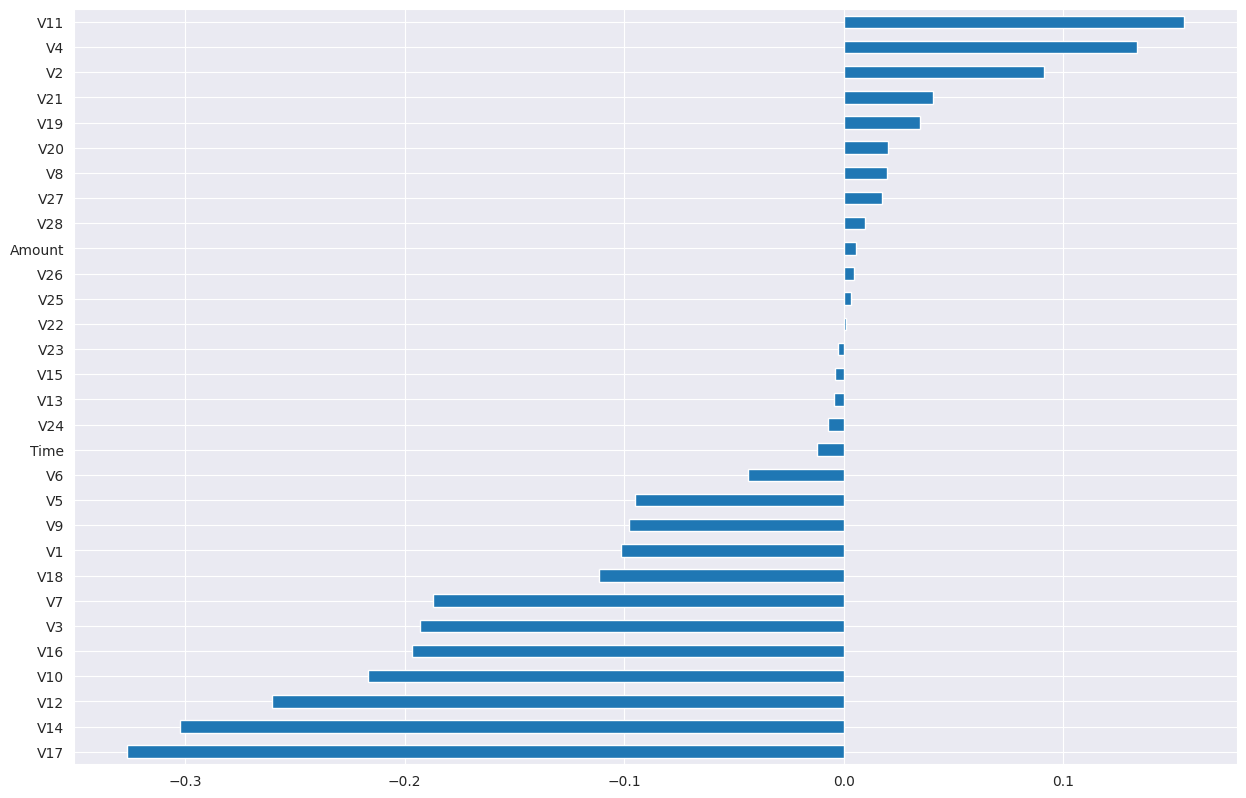

In [20]:
plt.figure(figsize=(15,10))
df.corr()["Class"].drop("Class").sort_values().plot.barh();

In [21]:
df_class0.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Fraud islemleri 48 saat icine rastgele dagilim gostermis :


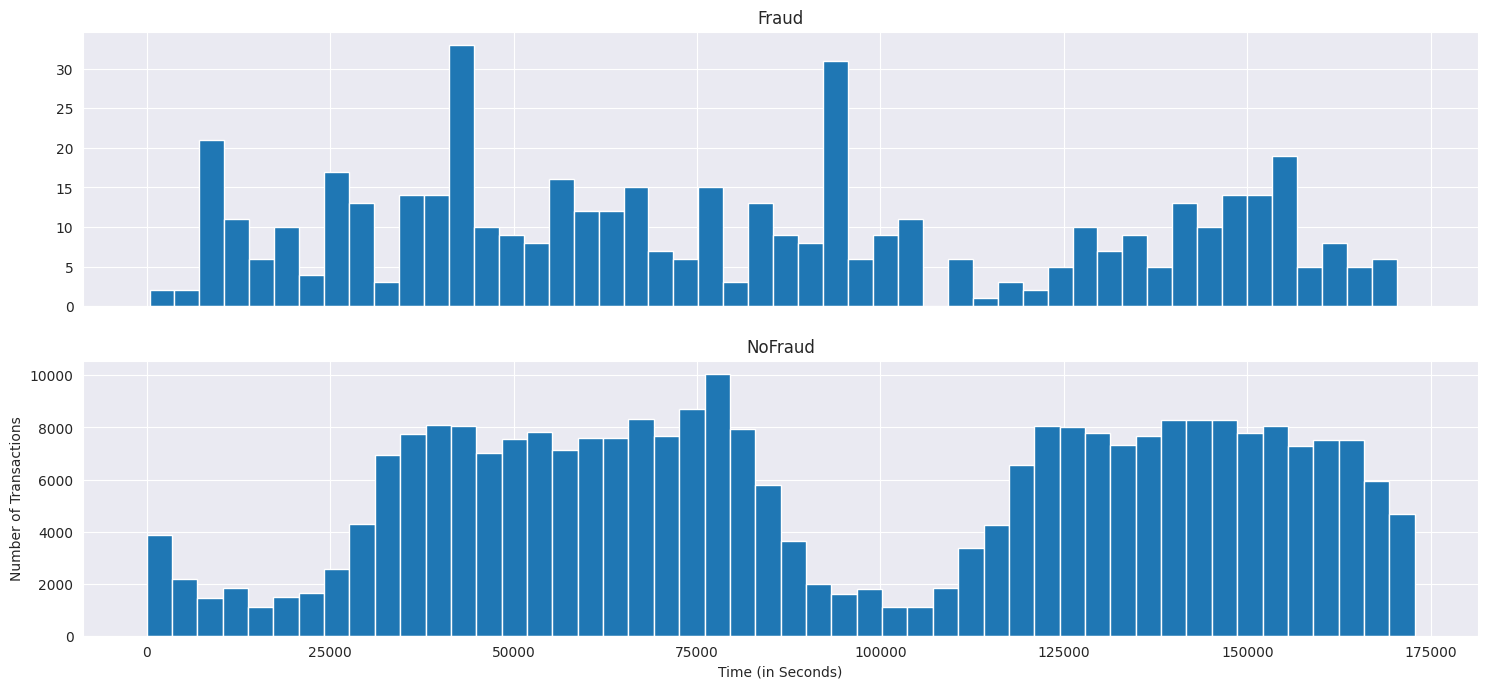

In [22]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(18,8))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('NoFraud')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

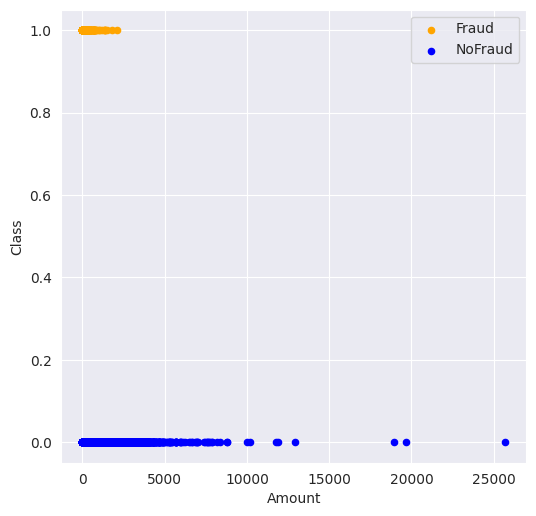

In [23]:
ax = df.loc[df['Class'] == 1].plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
df.loc[df['Class'] == 0].plot.scatter(x='Amount', y='Class', color='Blue', label='NoFraud', ax=ax)
plt.show()

Ustteki ve alttaki gosterim, yapilan islemlerin fiyatini temsil ediyor. Fraud islemlerinde en fazla yapilan harcama 2500 euro civarlarinda iken Fraud olmayan islemler 25000 euro' ya kadar cikmis.

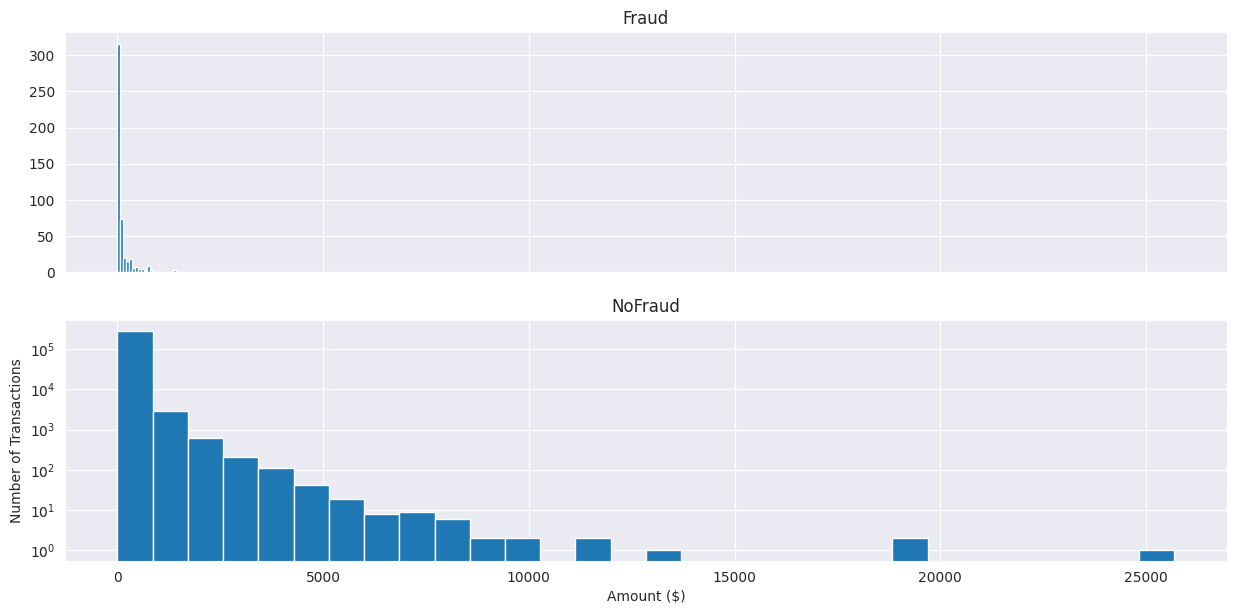

In [24]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,7))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('NoFraud')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

1 ve 0 class' larinin PCA yontemi ile olusturulan componentlerin icindeki dagilimlarini gormek icin asagidaki grafikleri cizdirdik. 9, 10, 11, 12, 14, 16 ve ozellikle de 17. ve 18. componentler icinde class' larin birbirinden daha iyi ayristigini soyleyebiliriz :

In [25]:
import matplotlib.gridspec as gridspec


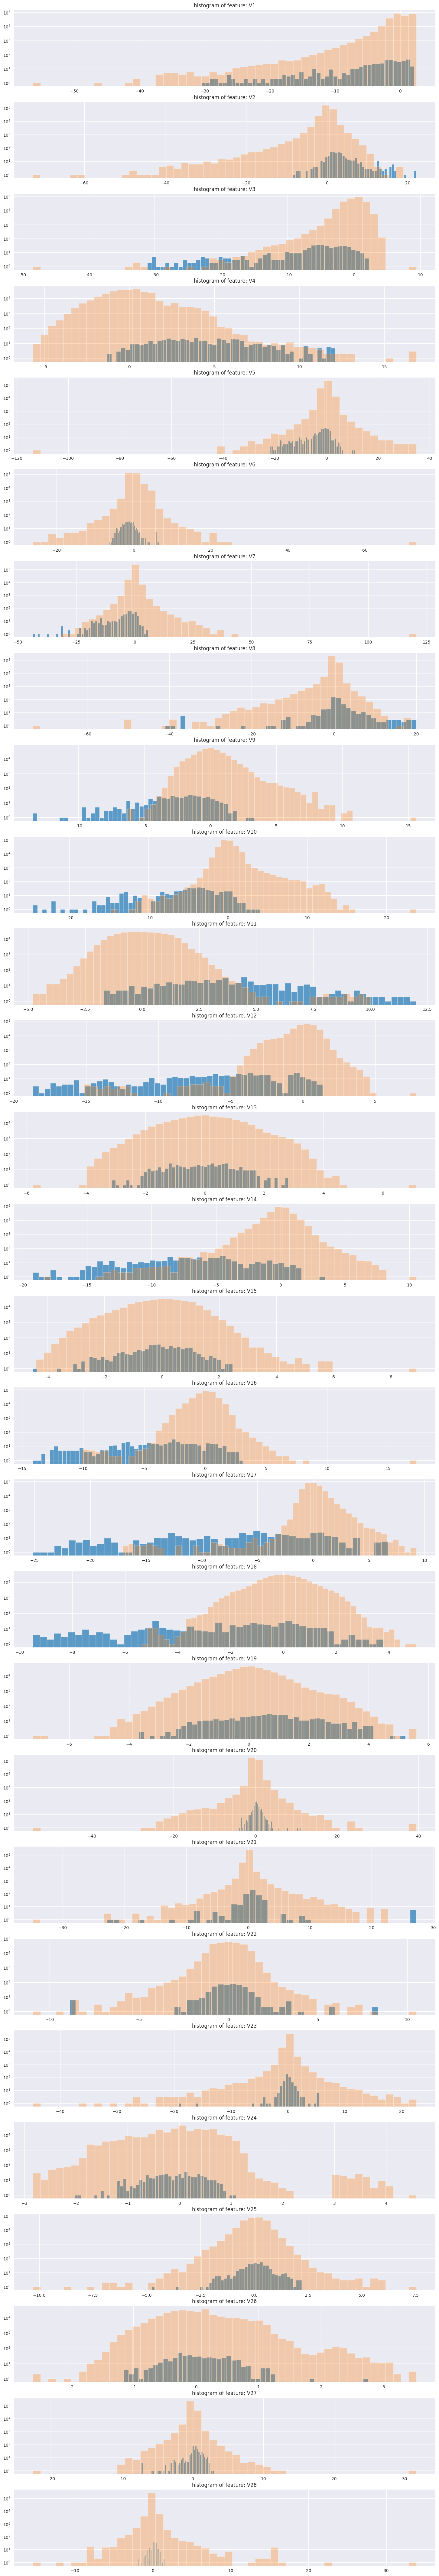

In [26]:
plt.figure(figsize=(18,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df.drop(['Time', 'Class', 'Amount'], axis=1)):
    ax = plt.subplot(gs[i])
    plt.hist(df[cn][df.Class == 1], bins=50, alpha = 0.7)
    plt.hist(df[cn][df.Class == 0], bins=50, alpha = 0.3)
    plt.yscale('log')
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [27]:
df.duplicated().sum()

1081

In [28]:
df.drop_duplicates(inplace=True)

In [29]:
df.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [30]:

import plotly.express as px

In [31]:
fig = px.pie(df, values = df['Class'].value_counts(), 
             names = (df['Class'].value_counts()).index, 
             title = '"Class" Column Distribution')
fig.show()

### Data Cleaning
Check Missing Values and Outliers

In [32]:
df.isna().sum().sum()

0

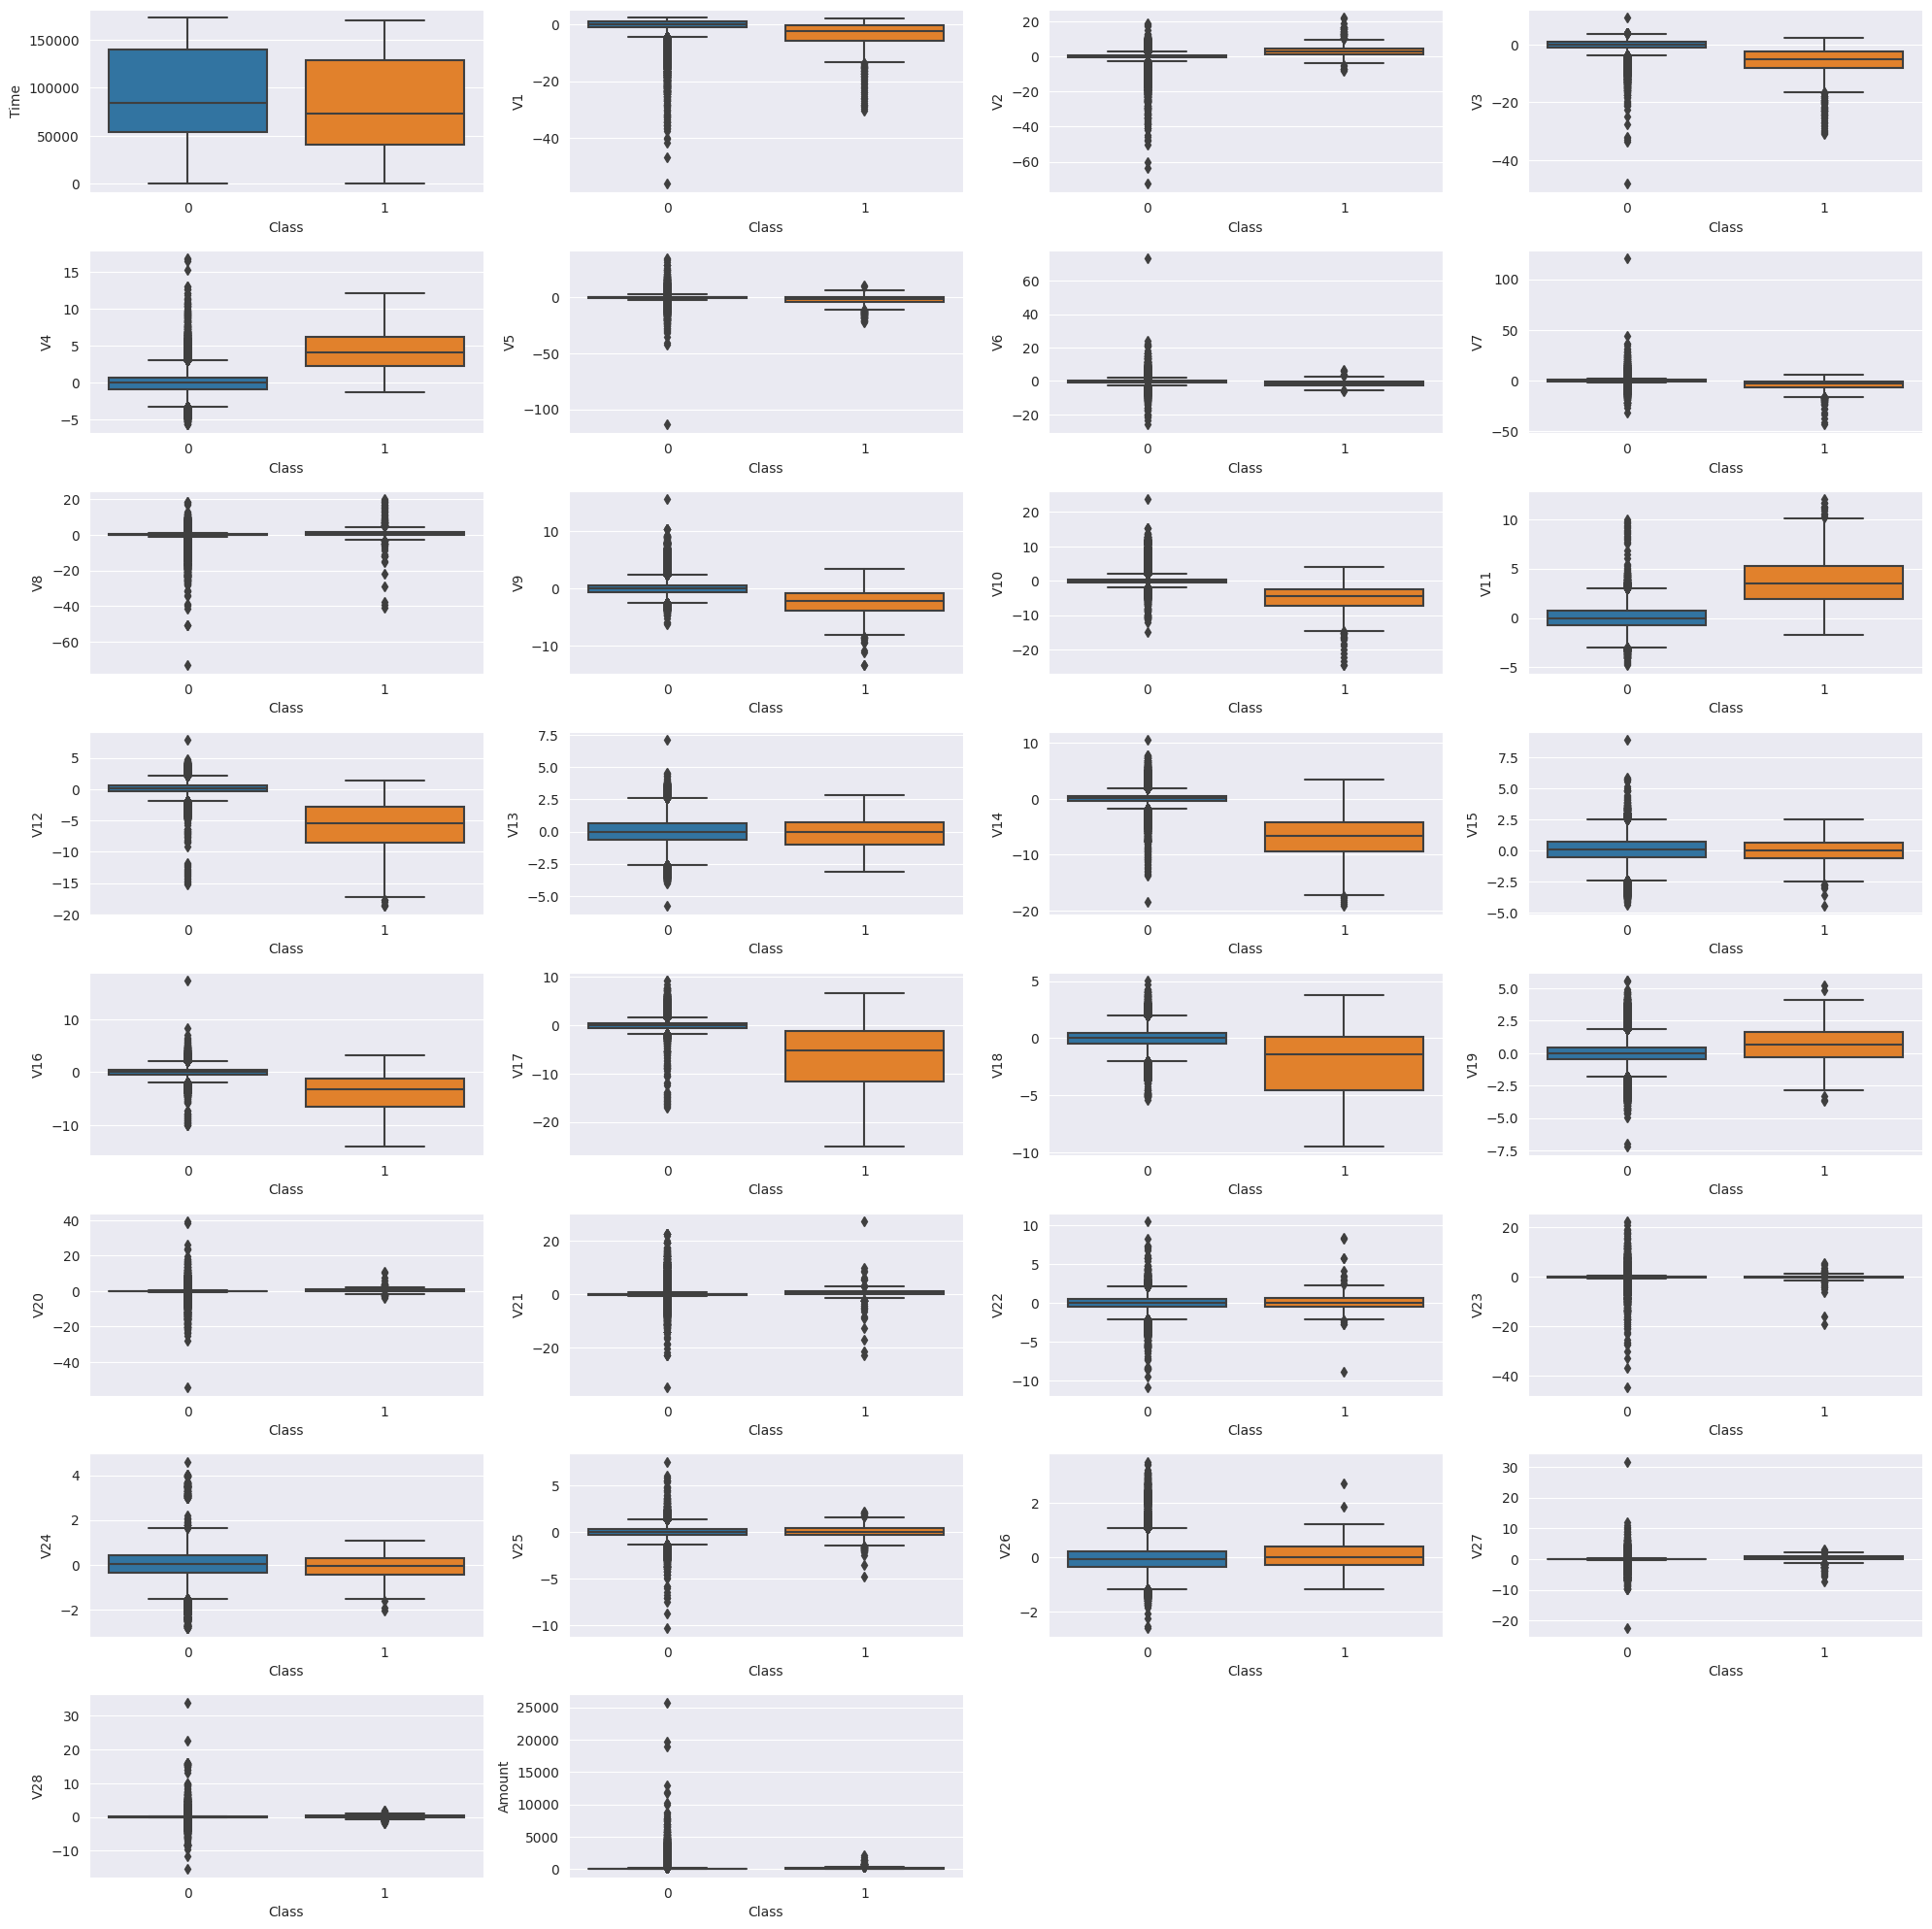

In [33]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns :
    if feature != 'Class' :
        index += 1
        plt.subplot(8,4,index)
        sns.boxplot(x = 'Class', y = feature, data = df)
plt.tight_layout()
plt.show();

Feature' lar icinde az da olsa outlier verilere rastlandi. Fakat feature' larimiz PCA yontemi ile elde edilen componentler oldugu icin outlier verilerin ne olduklari hakkinda bilgi sahibi degiliz. 1 class' ina ait verimiz az oldugu icin de veri kaybetmemek adina outlier verileri silmeden devam etme karari aldik :

---
---


## 2. Data Preprocessing

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [34]:
X = df.drop(['Class', 'Time'], axis = 1)
y = df.Class ##burda time da dusurudk cunku bi etlkisi olmadigi icin. datayi rahatlatmak icin . 

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, stratify=y, random_state=42)

#### Scaling

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [38]:
operations = [("scaler", StandardScaler()), ('log', LogisticRegression())]

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. 

There is a type of oversampling called **[SMOTE](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)** (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

- It is important that you can evaluate the effectiveness of SMOTE. For this reason, implement the Logistic Regression algorithm in two different ways, with SMOTE applied and without.

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression without SMOTE

- The steps you are going to cover for this algorithm are as follows: 

   i. Import Libraries
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Import Libraries***

In [39]:
from sklearn.linear_model import LogisticRegression

***ii. Model Training***

In [40]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [41]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, average_precision_score

In [42]:
pipe_model = Pipeline(steps=operations)

In [43]:
pipe_model.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('log', LogisticRegression())])

In [44]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[28319     7]
 [   17    30]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28326
           1       0.81      0.64      0.71        47

    accuracy                           1.00     28373
   macro avg       0.91      0.82      0.86     28373
weighted avg       1.00      1.00      1.00     28373


Train_Set
[[254891     36]
 [   163    263]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254927
           1       0.88      0.62      0.73       426

    accuracy                           1.00    255353
   macro avg       0.94      0.81      0.86    255353
weighted avg       1.00      1.00      1.00    255353



CROSS VALIDATE

In [45]:
from sklearn.model_selection import cross_validate

In [46]:
operations = [('scaler',StandardScaler()),('log',LogisticRegression())]
model = Pipeline(operations)

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision    0.866840
test_recall       0.612458
test_f1           0.716575
test_accuracy     0.999193
dtype: float64

In [47]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score

In [48]:
y_pred = pipe_model.predict(X_test)
log_f1 = f1_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred)

with class_weight

In [49]:
class_weights = {0:1, 1:15}

In [50]:
operations = [("scaler", StandardScaler()), ('log', LogisticRegression(class_weight=class_weights))]

In [51]:
pipe_model_weight = Pipeline(steps=operations)

In [52]:
pipe_model_weight.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log', LogisticRegression(class_weight={0: 1, 1: 15}))])

In [53]:
eval_metric(pipe_model_weight, X_train, y_train, X_test, y_test) ##class_weight isleminden sonra presicion skorlari duserken recall skorlarimiz yukseldi :

Test_Set
[[28312    14]
 [    6    41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28326
           1       0.75      0.87      0.80        47

    accuracy                           1.00     28373
   macro avg       0.87      0.94      0.90     28373
weighted avg       1.00      1.00      1.00     28373


Train_Set
[[254785    142]
 [    78    348]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254927
           1       0.71      0.82      0.76       426

    accuracy                           1.00    255353
   macro avg       0.85      0.91      0.88    255353
weighted avg       1.00      1.00      1.00    255353



Cross Validate sonucu elde ettigimiz precision skorlari tek seferlik skorlardan biraz dusuk cikti :

In [54]:
operations = [('scaler',StandardScaler()),('log',LogisticRegression(class_weight=class_weights))]
model = Pipeline(operations)

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision    0.704892
test_recall       0.809967
test_f1           0.751656
test_accuracy     0.999103
dtype: float64

***iii. Prediction and Model Evaluating***

In [55]:
y_pred = pipe_model_weight.predict(X_test)

In [56]:
y_pred_proba = pipe_model_weight.predict_proba(X_test)

In [57]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,pred,pred_proba
272752,1.638152,0.574462,-1.350495,4.136355,0.634896,0.413963,-0.281198,0.280791,-0.774203,0.269559,1.268756,-0.397367,-0.536479,-2.994331,-0.701164,2.339497,1.295301,2.012488,-2.106463,0.006558,0.250484,0.567569,-0.012042,0.428939,-0.134347,0.125404,0.016239,0.043490,97.58,0,0,0.250196
76437,-0.467958,0.389235,0.458680,-2.173947,0.040808,-1.041474,1.195709,-0.266412,0.169296,-1.214167,1.272303,0.922032,-0.142853,0.601447,0.561954,-0.532178,-0.374573,0.087344,1.576641,-0.049925,-0.237547,-0.674008,0.085752,0.005914,0.096774,-0.332324,-0.089310,-0.037425,75.00,0,0,0.000329
211253,-0.424849,1.440450,1.144727,2.770542,1.274736,-0.266094,1.160302,-0.151599,-1.942956,0.649006,-1.297299,0.073363,1.165797,-0.124062,-1.486308,0.614403,-0.906942,-0.371149,-1.706106,-0.112490,0.270038,0.812179,-0.253067,0.072351,-0.149161,0.011216,0.139467,0.183261,1.71,0,0,0.012175
57879,-0.420720,1.111619,0.327102,0.576413,0.397109,0.472003,1.194556,-0.050733,-0.695257,0.333620,0.954413,0.437288,-0.111482,0.492898,0.509152,-0.294587,-0.400356,-0.183335,0.824693,-0.115296,-0.277228,-0.590946,0.067694,-0.714564,-0.429953,-0.714029,-0.573666,-0.528977,95.67,0,0,0.001378
157023,-0.510717,0.715860,2.273823,-0.292627,0.255276,0.129961,0.366883,-0.060750,1.404811,-0.942314,1.529139,-2.466921,0.795564,1.593812,0.014673,0.053204,-0.021348,1.222640,0.957099,0.028248,-0.288505,-0.449137,-0.346551,-0.462355,0.248907,-0.724745,-0.089452,-0.160963,2.30,0,0,0.001170
184354,-0.292081,1.071984,-1.174271,-1.159829,0.953344,-1.018811,1.119461,0.224547,-0.726487,-0.702866,0.408227,-0.155483,-1.911221,1.585811,-0.660480,-0.302635,-0.345514,0.296765,0.121787,-0.389918,0.374359,0.888647,-0.136599,0.714972,-0.431407,0.027988,0.008789,0.138837,9.25,0,0,0.002001
102341,-1.620148,0.788326,-0.459619,-0.792879,2.779647,3.292548,0.162270,0.371364,0.130530,0.871490,0.202633,-0.462651,0.011560,-0.717910,1.584874,0.292269,-0.424122,0.314910,1.047646,-0.008200,-0.299377,-0.807808,0.111005,0.952479,-0.378565,0.036151,-0.939904,0.270948,2.69,0,0,0.000349
138457,1.157112,-0.602122,0.779474,0.441914,-0.996394,0.157741,-0.696661,0.057992,-0.839704,0.807448,0.647023,1.135804,1.271047,-0.274636,-0.468513,-1.196024,-0.490391,1.913918,-0.725607,-0.330169,-0.163785,0.045206,-0.172661,0.020550,0.551039,-0.229535,0.068612,0.033727,71.00,0,0,0.001119
122244,1.055302,-1.215694,-0.619017,-0.729494,-0.368401,0.430030,-0.264539,0.078239,-0.838164,0.698638,-0.045229,-0.215563,-0.805263,0.432065,-0.265575,-1.479086,-0.014428,1.191278,-0.142354,-0.189269,-0.350742,-0.857015,-0.277034,-1.122533,0.383670,1.161309,-0.098483,0.001316,185.70,0,0,0.000309
156084,-0.480844,0.710581,2.360350,-0.104984,-0.055559,-0.303450,0.401247,-0.138651,1.815161,-1.088258,-0.031419,-3.651225,-0.344479,1.652482,0.865814,-0.239798,0.467986,0.676002,0.482909,-0.081532,-0.329028,-0.572796,-0.279561,-0.171327,0.180657,-0.718079,-0.088612,-0.151161,2.12,0,0,0.002751


In [58]:
log_weighted_f1 = f1_score(y_test, y_pred)
log_weighted_recall = recall_score(y_test, y_pred)
log_weighted_auc = roc_auc_score(y_test, y_pred)

Datadaki bir ornekten prediction :

In [59]:
df[df.Class == 1].head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [60]:
pipe_model_weight.predict(X.loc[[541]])    # True prediction

array([1])

In [61]:
pipe_model_weight.predict(X.loc[[623]])      # Wrong prediction

array([0])

matthews_corrcoef --> Alinan gercek degerler ile tahmin degerleri arasindaki corr

matthews_corrcoef ve cohen_kappa_score dengesiz datasetlerinde genel performans icin bakilan skorlardir.

In [62]:
from sklearn.metrics import matthews_corrcoef

y_pred = pipe_model_weight.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.8060626350171862

In [63]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.8035706620844923


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


In [64]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, average_precision_score

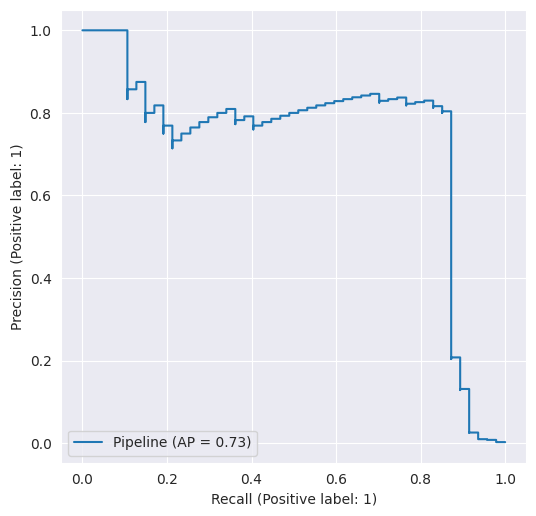

In [65]:
plot_precision_recall_curve(pipe_model_weight, X_test, y_test);

In [66]:
y_pred_proba = pipe_model.predict_proba(X_train)
average_precision_score(y_train, y_pred_proba[:,1])

0.7523887879703827

***v. Apply StratifiedKFold***

In [67]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])


In [68]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.08225204934729767

In [69]:
from sklearn.model_selection import StratifiedKFold    # Modeli kaç parçaya ayırmak istiyorsak ona göre index numaraları belirler.

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)       # Index no'ları her işlemden sonra sıfırlaması için.
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [70]:
CV(10, pipe_model, pd.DataFrame(X_train), y_train, 0.5)

Accuracy      99.92%  std 0.01%
Precision-1   87.18%  std 5.12%
Recall-1      60.58%  std 5.45%
F1_score-1    71.28%  std 4.11%


In [71]:
CV(10, pipe_model, pd.DataFrame(X_train), y_train, optimal_threshold)

Accuracy      99.92%  std 0.01%
Precision-1   77.27%  std 4.60%
Recall-1      77.26%  std 4.01%
F1_score-1    77.18%  std 3.51%


- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class recall is not sufficient, apply **SMOTE**.

### Apply SMOTE

In [111]:
#conda install imblearn


In [72]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline


In [112]:
y_train.value_counts()

0    254927
1       426
Name: Class, dtype: int64

In [74]:
#over = SMOTE(sampling_strategy=0.1)
#under = RandomUnderSampler(sampling_strategy=0.5)

SMOTE islemi ile az olan 1 class' inin veri sayisini sentetik olarak artirarak yaklasik 3 katina cikardik. 0 class' ina ait veri sayisini da yaklasik 2.5 kat azalttik :

In [75]:
over = SMOTE(sampling_strategy={1: 1000})
under = RandomUnderSampler(sampling_strategy={0: 100000})

In [76]:
X_resampled, y_resampled = over.fit_resample(X_train, y_train)

In [77]:
X_resampled, y_resampled = under.fit_resample(X_resampled, y_resampled)

In [78]:
y_resampled.value_counts()

0    100000
1      1000
Name: Class, dtype: int64

### Logistic Regression with SMOTE

- The steps you are going to cover for this algorithm are as follows:
   
   *i. Train-Test Split (Again)*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Train-Test Split (Again)***

Use SMOTE applied data.

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [110]:
class_weight_smote = {0:1, 1:1}

In [113]:
operations = [('o', over), ('u', under), ("scaler", StandardScaler()), 
              ('log', LogisticRegression(class_weight=class_weight_smote, random_state = 42))]

In [114]:
smote_pipeline_log = imbpipeline(steps=operations)

***ii. Model Training***

In [115]:
smote_pipeline_log.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={1: 1000})),
                ('u', RandomUnderSampler(sampling_strategy={0: 100000})),
                ('scaler', StandardScaler()),
                ('log',
                 LogisticRegression(class_weight={0: 1, 1: 1},
                                    random_state=42))])

***iii. Prediction and Model Evaluating***

Smote isleminden sonra kurulan Logistic Regression modelde precision ve recall skorlari birbirine biraz daha yaklasti :

In [116]:
eval_metric(smote_pipeline_log, X_train, y_train, X_test, y_test)

Test_Set
[[28316    10]
 [    7    40]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28326
           1       0.80      0.85      0.82        47

    accuracy                           1.00     28373
   macro avg       0.90      0.93      0.91     28373
weighted avg       1.00      1.00      1.00     28373


Train_Set
[[254839     88]
 [    91    335]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254927
           1       0.79      0.79      0.79       426

    accuracy                           1.00    255353
   macro avg       0.90      0.89      0.89    255353
weighted avg       1.00      1.00      1.00    255353



Cross Validate

In [117]:
model = smote_pipeline_log = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_accuracy    0.999260
test_recall      0.776966
test_f1          0.778550
dtype: float64

iv. Plot Precision and Recall Curve

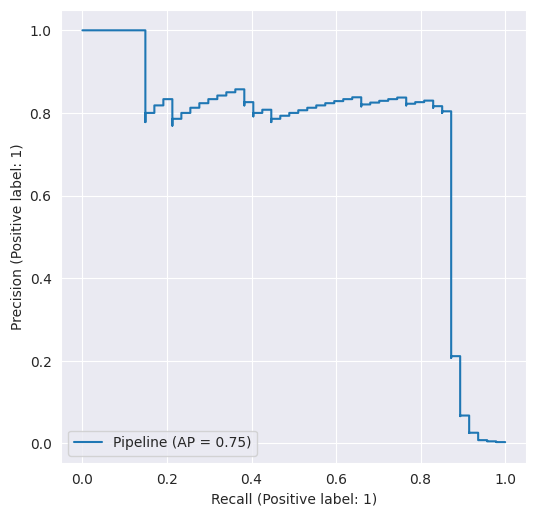

In [118]:
plot_precision_recall_curve(smote_pipeline_log, X_test, y_test);

***v. Apply StratifiedKFold***

In [119]:
 CV(10, smote_pipeline_log, pd.DataFrame(X_train), y_train, optimal_threshold)

Accuracy      99.84%  std 0.03%
Precision-1   51.44%  std 6.24%
Recall-1      84.77%  std 4.64%
F1_score-1    63.76%  std 4.95%


In [120]:
 CV(10, smote_pipeline_log, pd.DataFrame(X_train), y_train, 0.5)

Accuracy      99.93%  std 0.01%
Precision-1   78.54%  std 3.78%
Recall-1      79.13%  std 2.92%
F1_score-1    78.77%  std 2.59%


In [121]:
y_pred = smote_pipeline_log.predict(X_test)
smote_pipeline_f1 = f1_score(y_test, y_pred)
smote_pipeline_recall = recall_score(y_test, y_pred)
smote_pipeline_auc = roc_auc_score(y_test, y_pred)

### Random Forest Classifier with SMOTE

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating*
   
   *iii. Plot Precision and Recall Curve*
   
   *iv. Apply and Plot StratifiedKFold*
   

***i. Model Training***

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
class_weights = {0 : 1, 1 : 1}

In [124]:
over = SMOTE(sampling_strategy={1: 1000})
under = RandomUnderSampler(sampling_strategy={0: 100000})

In [125]:
rf_operations = [('o', over), ('u', under), ('rf', RandomForestClassifier(class_weight=class_weights, max_depth=7, random_state=42))]
smote_rf_model = imbpipeline(steps=rf_operations)

In [126]:
smote_rf_model.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={1: 1000})),
                ('u', RandomUnderSampler(sampling_strategy={0: 100000})),
                ('rf',
                 RandomForestClassifier(class_weight={0: 1, 1: 1}, max_depth=7,
                                        random_state=42))])

RF default parametreler ile kurulan modelde overfit durumu gozlendi. Parametreler ile oynanarak en iyi skor max_depth=7 parametresi ile alindi :

In [127]:
eval_metric(smote_rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[28319     7]
 [    7    40]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28326
           1       0.85      0.85      0.85        47

    accuracy                           1.00     28373
   macro avg       0.93      0.93      0.93     28373
weighted avg       1.00      1.00      1.00     28373


Train_Set
[[254886     41]
 [    73    353]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254927
           1       0.90      0.83      0.86       426

    accuracy                           1.00    255353
   macro avg       0.95      0.91      0.93    255353
weighted avg       1.00      1.00      1.00    255353



In [128]:
model = RandomForestClassifier(class_weight = class_weights, max_depth=7, random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy     0.999503
test_precision    0.943165
test_recall       0.748837
test_f1           0.833126
dtype: float64

***ii. Prediction and Model Evaluating***

In [129]:
y_pred = smote_rf_model.predict(X_test)
smote_rf_f1 = f1_score(y_test, y_pred)
smote_rf_recall = recall_score(y_test, y_pred)
smote_rf_auc = roc_auc_score(y_test, y_pred)

In [130]:
smote_rf_model.predict(X.loc[[541]])      # True prediction


array([1])

In [131]:
smote_rf_model.predict(X.loc[[623]])        # Wrong prediction

array([0])

***iii. Plot Precision and Recall Curve***


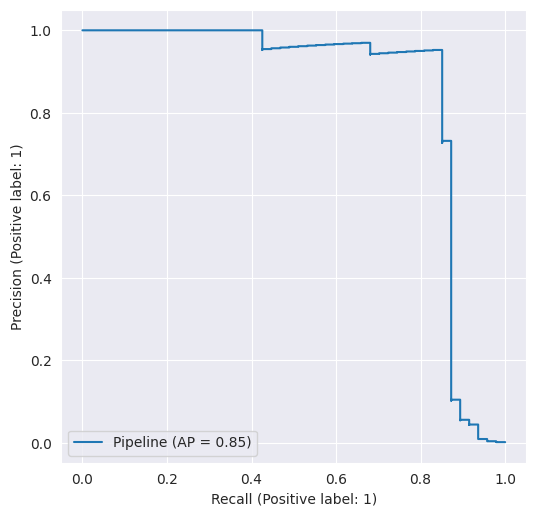

In [132]:
plot_precision_recall_curve(smote_rf_model, X_test, y_test);

***iv. Apply StratifiedKFold***

In [133]:
# without class_weight for StratifiedKFold :

rf_operations = [('o', over), ('u', under), ('rf', RandomForestClassifier(max_depth=7, random_state=42))]
rf_stratified = imbpipeline(steps=rf_operations)

rf_stratified.fit(X_train, y_train)

eval_metric(rf_stratified, X_train, y_train, X_test, y_test)

Test_Set
[[28319     7]
 [    7    40]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28326
           1       0.85      0.85      0.85        47

    accuracy                           1.00     28373
   macro avg       0.93      0.93      0.93     28373
weighted avg       1.00      1.00      1.00     28373


Train_Set
[[254875     52]
 [    72    354]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254927
           1       0.87      0.83      0.85       426

    accuracy                           1.00    255353
   macro avg       0.94      0.92      0.93    255353
weighted avg       1.00      1.00      1.00    255353



In [134]:
model = RandomForestClassifier(max_depth=7, random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy     0.999503
test_precision    0.943165
test_recall       0.748837
test_f1           0.833126
dtype: float64

In [135]:
y_pred_proba = rf_stratified.predict_proba(X_train)
average_precision_score(y_train, y_pred_proba[:,1])

0.869777329108857

In [136]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [137]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.7540275886538973

In [138]:
CV(10, smote_rf_model, pd.DataFrame(X_train), y_train, optimal_threshold)

Accuracy      99.95%  std 0.01%
Precision-1   93.19%  std 4.35%
Recall-1      73.72%  std 5.18%
F1_score-1    82.15%  std 3.46%


In [139]:
CV(10, smote_rf_model, pd.DataFrame(X_train), y_train, 0.5)


Accuracy      99.94%  std 0.01%
Precision-1   84.93%  std 4.53%
Recall-1      81.26%  std 4.44%
F1_score-1    83.00%  std 4.00%


In [140]:
CV(10, rf_stratified, pd.DataFrame(X_train), y_train, optimal_threshold)

Accuracy      99.95%  std 0.01%
Precision-1   92.79%  std 5.34%
Recall-1      73.27%  std 6.90%
F1_score-1    81.68%  std 5.20%


In [141]:
CV(10, rf_stratified, pd.DataFrame(X_train), y_train, 0.5)

Accuracy      99.94%  std 0.01%
Precision-1   84.79%  std 4.31%
Recall-1      81.25%  std 3.94%
F1_score-1    82.90%  std 3.18%


### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [142]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

***ii. Define Model***

In [143]:
X2 = df[feature]             
y = df.Class.values
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X2,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=seed)

In [144]:
scaler = StandardScaler()

In [145]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: ignored

In [146]:
tf.random.set_seed(seed)

model_ann = Sequential()

model_ann.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model_ann.add(Dense(15, activation = "relu"))
model_ann.add(Dense(1, activation = "sigmoid"))

IndexError: ignored

***iii. Compile Model***

***iv. Fit Model***

***v. Prediction and Model Evaluating***

***vi. Plot Precision and Recall Curve***

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Streamlit API.

### Save and Export the Model as .pkl


### Save and Export Variables as .pkl

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___